# **Scraping the Yellowpages.com Using Beautiul Soup And Python...**

 ##### Extracting the **New York Restaurants** details from website [Yellowpages.com](https://www.yellowpages.com)


![](https://i.imgur.com/YRU4ats.gif)



# **Introduction**
   There is a vast amount of data available on the internet, most of it is in the unstructured format those data cannot be used directly to build a model .So industries find a way to extract meaningful information from unstructured data. This is where web scraping comes into the picture.

**What is yellowpages.com?**


[Yellowpages.com](https://www.yellowpages.com) is a United States-based web site operated by Thryv that provides listings for local businesses. In 2013, it was re-branded as YP.com or simply "YP". It currently offers a broad range of marketing tools including online presence, local search, display ads and direct marketing.












***What is Webscraping ?***

Web Scraping is an automatic way to retrieve unstructured data from a website and store them in a structured format. 

For example, if you want to analyze what kind of restaurant can success in New York, you may want to scrape all the New York resturant information on an website like Yellowpages.com and amy more websites

![](https://i.imgur.com/oVEZuFO.jpg)


##  **How ro run the code**

You can execute the code using "Run" button on the top of this page and selecting "Run on Colab" or "Run Locally"

**Setup and Tools**

**Run on Colab :** You will need to provide the Google login to run this notebook on Colab.

**Run Locally :** Download and install Anaconda framework, We will be using Jupyter Notebook for writing & executing code.


# **Motivation for the project**
Now a days Rasturant business is one of the fastest-growing business in the world. It is expected to reach INR 5.99 lakh crore by 2022-23, growing at a compounded annual growth rate of 9 percent.
Restaurants from all over the world can be found here in NewYork,we can get all type of cuisines here. The number of restaurant are increasing day by day. Currently which stands at approximately 26,000 restaurants.

This industry hasn't been saturated yet, And new restaurants are opening every day. However it has become difficult for them to compete with already established restaurants. 
This YelloPages datset aims at analysing demography of the location. Most importantly it will help new restaurants in deciding their theme, menus, cuisine, etc for a particular location. It also aims at finding similarity between neighborhoods of Bengaluru on the basis of food.


![](https://i.imgur.com/FwqTbT6.jpg)


##  **Outline of the Project**
In this project we created more than 10 reusable functins and 3 main function .The steps we followed in this project is as bellow.

>** Step:-1 ** Select the suitable page_url and Install the required Python libraries.

> **Step:-2** Assign that page to BeautifulSoup library from request to parse the html page and convert them into html doc format to scraope the information.

>**Step:-3 **select the suitable tag which contains required informations.

>**Step:-4** creating the reusable Functions from parsed htnl doc.Here we extracted the information in two parts,

For part-1 tags are parsed from main url pages they are ,
  1.  get_name(doc)
  2.  get_Phone(doc)
  3.  get_address(doc)
  4.  get_online(doc)
  5. get_info_web(doc)

Part-2 below tags are extracted from each hotel info_web tag urls 
   6. get_Cuisine(doc1)
   7. get_payment(doc1)
   8. get_neighborhoods(doc1)





> **Step:-5** create a reusable function  which returns list of urls to extract tags from multiple pages

> **Step:6**  Create main function as **get_main_page_tags()**  which loop over the multiple pages and get each part-1 tags ,get information and return them in the data frame format.And assign that function as **df_1**

> **Step:-7** cretae one more main function as **get_individual_page_tags()** to loop over the each part-2 tags and return them in datarame format.And assign that function as **df_2**

> **Step:-8** create final main function as **scrape_yellowpages()** to merge all tags exrtacted  from above two main functions return them in csv format

Finally commit the project and updating scraped data in csv format to  jovian

# **Step:-1  Select the suitable page_url and Install the required Python libraries**

In [2]:
# installing required libreries
! pip install requests --upgrade --quiet
! pip install beautifulsoup4 --upgrade --quiet
! pip install pandas --upgrade -quiet


import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


![](https://i.imgur.com/Rnju1SY.png)

In [3]:
# selecting the suitable page_url  as hsoen in above
topic_url = "https://www.yellowpages.com/search?search_terms=restaurants&geo_location_terms=New+York%2C+NY"

In [4]:
# check the responce status of selected website url
response = requests.get(topic_url)
response.status_code

200

Here we use __requests.get()__ function for getting responce from the topic uls . If the responce code is **between 200 to 299** .
it will allowe you to parse the information, Check the meaning of diffarent values or respone code [**here**](https://www.codementor.io/blog/python-web-scraping-63l2v9sf2q)

# **Step:-2 Assign that page to BeautifulSoup library from request to parse the html page and convert them into html doc format to scraope the information.** 

In [5]:

page_contents = response.text

# assign the page content into beautifulSoup librery .
doc = BeautifulSoup(page_contents,'html.parser')
#doc

# **Step:-3 select the suitable tag which contains required informations.**

![](https://i.imgur.com/VTtpyn7.png)

Here the "div" tag with attribute class_="result" contain all the requried detile from each tags we have to scrape requird details 

In [6]:
# selcting the suitable tag
tags=doc.find_all("div", class_= "result")
#tags
#len(tags)      # can check the length of the total tags in a page

#  **Step:-4  Select the suitable page_url and Install the required Python libraries.**

For part-1 tags are parsed from main url pagethey are ,

In [7]:
# Extracting the Name of the hotels

def get_name(doc):
  doc1 = doc
  tags=doc1.find_all("div", class_= "result")
  Name = []
  for tag in tags:
      name = tag.find("a",class_="business-name").text
      Name.append(name)
  return Name

#get_name(doc)

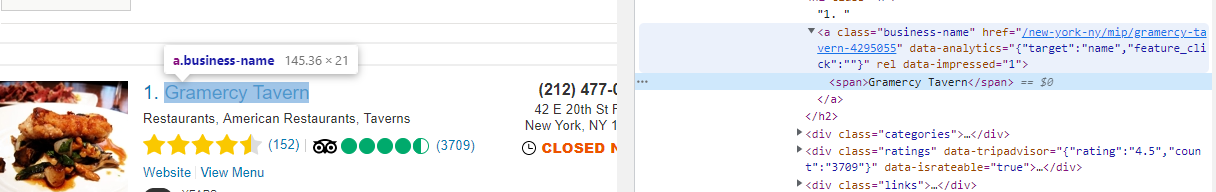

As shown above inspect the each tags from the html tags to scrape 

In [8]:
#Extracting the phone number
def get_Phone(doc):
  Phone_num = []
  doc1 = doc
  tags=doc1.find_all("div", class_= "result")
  for tag in tags:
      Phone = tag.find("div",class_="phones phone primary").text
      Phone_num.append(Phone)
  return Phone_num

#get_Phone(doc)


In [9]:
#Extracting the Address
def get_address(doc):
    Locality = []
    Pincode = []
    doc1 = doc
    tags=doc1.find_all("div", class_= "result")

    for tag in tags:
        address= tag.find("div",class_="adr").text
        sep = ','
        local = address.split(sep, 1)[0]
        Postal = address.split(sep,1)[1]
        Locality.append(local)    
        Pincode.append(Postal)
    return Locality,Pincode

#get_address(doc)

In [10]:
#Extracting the Online_Orders 
def get_online(doc):
    Online_order =[]
    doc1 = doc
    tags=doc1.find_all("div", class_= "result")

    for tag in tags:
        try:
            online = tag.find("a",class_="action order-online").text
            Online_order.append(online)
        except Exception:
            online = ""
            Online_order.append(online)
    return Online_order

#get_online(doc)

In [11]:
#Extracting the individual hotel urls 
def get_info_web(doc):
    info_website = []
    base_url = "https://www.yellowpages.com"

    doc1 = doc
    tags=doc1.find_all("div", class_= "result")


    for tag in tags:
        try:
            url_info = tag.find("a",class_="business-name")["href"]
            info_website.append(base_url + url_info)
        except Exception:
            url_info = ""
            info_website.append(base_url + url_info)
    return info_website

#get_info_web(doc)

## **Create the reusable functions for to create BeautifulSoup doc**

In [12]:
# creating the user function for to get response from the url
def get_url_doc(url):

#getting resonse from the url
    response = requests.get(url)
    if response.status_code != 200:          # check the response status code value is equal or not to 200
        raise Exception('Failed to load page {}'.format(url))  # raise exception with url incase it not match the status code value
    Hotel_doc = BeautifulSoup(response.text,'html.parser')   
    
    return Hotel_doc              # return the function with soup document format

## **Part-2 below tags are extracted from each hotel info_web tag urls**

in second part we extract the tags from each hotels urls which was extracted in get_info_web() function .from each individual urls.extracted tags are s below

In [13]:
# Get tags from each info_web 
doc2  = get_url_doc(get_info_web(doc)[0])
#doc2        # here we send only one first individuals urls

In [14]:
# Extract the cusisne tags from each get_info_web(doc) urls

def get_Cuisine(doc2):
    Cuisine = []
    
    try:
        Cuisine.append(doc2.find("dd",class_="categories").text)
    except Exception:
        Cuisine.append("")
    return Cuisine

#get_Cuisine(doc2)

In [15]:
# Extract the payment type tags from each get_info_web(doc) urls
def get_payment(doc2):
    Payment = []
    try:
        Payment.append(doc2.find("dd",class_="payment").text)
    except Exception:
        Payment.append("")
    return Payment

#get_payment(doc2)

In [16]:
# Extract the Neighborhoods tags from each get_info_web(doc) urls
def get_neighborhoods(doc2):
    Neighborhoods =[]
    try:
        Neighborhoods.append(doc2.find("dd",class_="neighborhoods").text)
        
    except Exception:
        Neighborhoods.append(" ")
    return Neighborhoods
  
#get_neighborhoods(doc2)

# **Step:5 Create a reusable function  which returns list of urls.**

In [17]:
# to generate list of urls which helps to scrape from multiple pages
def get_url_list(topic_url):
    urls = []
    
    for i in range(5):  # here am  given the opage range from 0 to 4 pages we can custamize th erange
        pages =topic_url+str("&page=")+str(i+1)
            #url.append(pages)
        urls.append(pages)
    return urls

#get_url_list(topic_url)

# **Step:-6  Create main function as *get_main_page_tags()* which loop over the multiple pages and get each part-1 tags ,get information and return them in the data frame format**
  

In [18]:
def get_main_page_tags(): 
   url = get_url_list(topic_url)  

   Name_tag= []
   phone_tag = []
   Address_tag = []
   Pincode_tag = []
   Online_order_tag =[]
   Info_website_tag =[]
# looping over each tag

   for topic_url1 in url:
        doc = get_url_doc(topic_url1)
        Name_tag.extend(get_name(doc))
        phone_tag.extend(get_Phone(doc))
        Address_tag.extend(get_address(doc)[0])
        Pincode_tag.extend(get_address(doc)[1])
        Online_order_tag.extend(get_online(doc))
        Info_website_tag.extend(get_info_web(doc))
   time.sleep(random.randint(5,16))    #Script will be stopped for a period of time ranging from 5 to 16 seconds.

  # convert list of tags into dictionary   
   dict_ = {"Hotel_Name":Name_tag, "Phone_Num":phone_tag ,"Address": Address_tag,
            "Pincode":Pincode_tag,"Online_orders":Online_order_tag ,"Hotel_url":Info_website_tag }  # create the dictionary from extracted tags 
    
   df1_tags = pd.DataFrame(dict_)  # convert the the dictionary values into pandas datframe
   return df1_tags
   
#get_main_page_tags()

In [19]:
# assign the functon to variable as df_1
df_1 = get_main_page_tags()

In [20]:
df_1

,Hotel_Name,Phone_Num,Address,Pincode,Online_orders,Hotel_url
0,Mr. K's,(212) 583-1668,570 Lexington AveNew York,NY 10022,Order Online,https://www.yellowpages.com/new-york-ny/mip/mr...
1,Seven's Turkish Grill,(212) 724-4700,158 W 72nd StNew York,NY 10023,,https://www.yellowpages.com/new-york-ny/mip/se...
2,Todaro Brothers,(212) 532-0633,555 2nd AveNew York,NY 10016,Order Online,https://www.yellowpages.com/new-york-ny/mip/to...
3,Babbo,(212) 777-0303,110 Waverly PlNew York,NY 10011,Order Online,https://www.yellowpages.com/new-york-ny/mip/ba...
4,Sparks Steak House,(212) 687-4855,210 E 46th StNew York,NY 10017,Order Online,https://www.yellowpages.com/new-york-ny/mip/sp...
...,...,...,...,...,...,...
145,Cowgirl Seahorse,(212) 608-7873,259 Front StNew York,NY 10038,Order Online,https://www.yellowpages.com/new-york-ny/mip/co...
146,Rye House,(212) 255-7260,11 W 17th StNew York,NY 10011,,https://www.yellowpages.com/new-york-ny/mip/ry...
147,John's of 12th Street,(212) 475-9531,302 E 12th StNew York,NY 10003,Order Online,https://www.yellowpages.com/new-york-ny/mip/jo...
148,Burger & Barrel,(212) 334-7320,25 W Houston StNew York,NY 10012,,https://www.yellowpages.com/new-york-ny/mip/bu...


# **Step:-7cretae one more main function as *get_individual_page_tags()* to loop over the each part-2 tags and return them in datarame format.**

In [21]:

def get_individual_page_tags():
  urls_2 = df_1["Hotel_url"]
  
# Creating an empty lists of tags
  Cuisine_tags = []
  Payment_tags = []
  Neighborhoods_tags =[]

  # loop over the each doc
  for i in  urls_2:
     doc1 = get_url_doc(i)

     Cuisine_tags.extend(get_Cuisine(doc1))
     Payment_tags.extend(get_payment(doc1))
     Neighborhoods_tags.extend(get_neighborhoods(doc1))

  time.sleep(random.randint(5,16))        #Script will be stopped for a period of time ranging from 5 to 16 seconds.

  # convert the tags into dictionary  
  dict_1 = {"Cuisine":Cuisine_tags ,"Payments":Payment_tags, "Neighborhoods":Neighborhoods_tags}
    
  # converting them into pandas data frame
  Final_df2 = pd.DataFrame(dict_1)
  
  return Final_df2

#get_individual_page_tags()




In [ ]:
#assign the get_individual_page_tags() function as variable df_2
df_2 = get_individual_page_tags()

In [ ]:
df_2


# **Step:-8 create final main function as scrape_yellowpages() to merge all tags exrtacted from above two main functions return them in csv format**

In [ ]:
def scrape_yellowpages():
  Final_df =pd.concat([df_1,df_2],axis = 1 ,join= "inner")
  return Final_df

scrape_yellowpages()

In [ ]:
Final_df = scrape_yellowpages()

# convret the dataframe into csv file
Final_df.to_csv('Scraped_Yellowpages.com_Data_csv',index=False)

# **Future work**
n Feature there is an idea for creating the Database by collecting the data from differnt source of web sites.By collecting and Analysing those data we can get output for following
1. Need to scarpe the customer reviews, lat-long of restaurants, price range from the page.
2. Need to do EDA project on is demography is realy depends on price oe something els etc
3. Is cuisine is depends on neigbhourhood.

# **Concluson**
I Have tried my bit to explain this was the step-by-step introduction of Web Scraping using BeautifulSoup with Python from the different individuals with the help of suitable tags in html doc we extracted data and stored in the csv files .In addition to this some key points we have to notice below ,these are the pothole where we falls most of the time during coding

1. plz read the term and conditions of selected site where they allowing to scarpe our required data.
2. select suitable tags through inspecting th eurl page
3. In addition to this, be careful to time web requests such that the server is not flooded with traffic at an instant. otherwise if we sends contineous request, they blocked our IP address. to prevent thet we can use **time.sleep()** function to stop a period of time

Finnaly by working in this project we can familiar with basic python functions, loops, Tools like Selenium ,Beautifulsoup, Pandas etc.

# **Reference**

1.  https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/web-scraping-and-rest-apis
2.   https://www.danielherediamejias.com/6-basic-tips-to-perform-web-scraping-with-python/
3.  https://www.crummy.com/software/BeautifulSoup/bs4/doc
4. https://www.yellowpages.com/



In [ ]:
!pip install jovian --quiet
import jovian

In [ ]:
jovian.commit(project="Web_Scraping_project", outputs="Scraped_Yellowpages.com_Data_csv")